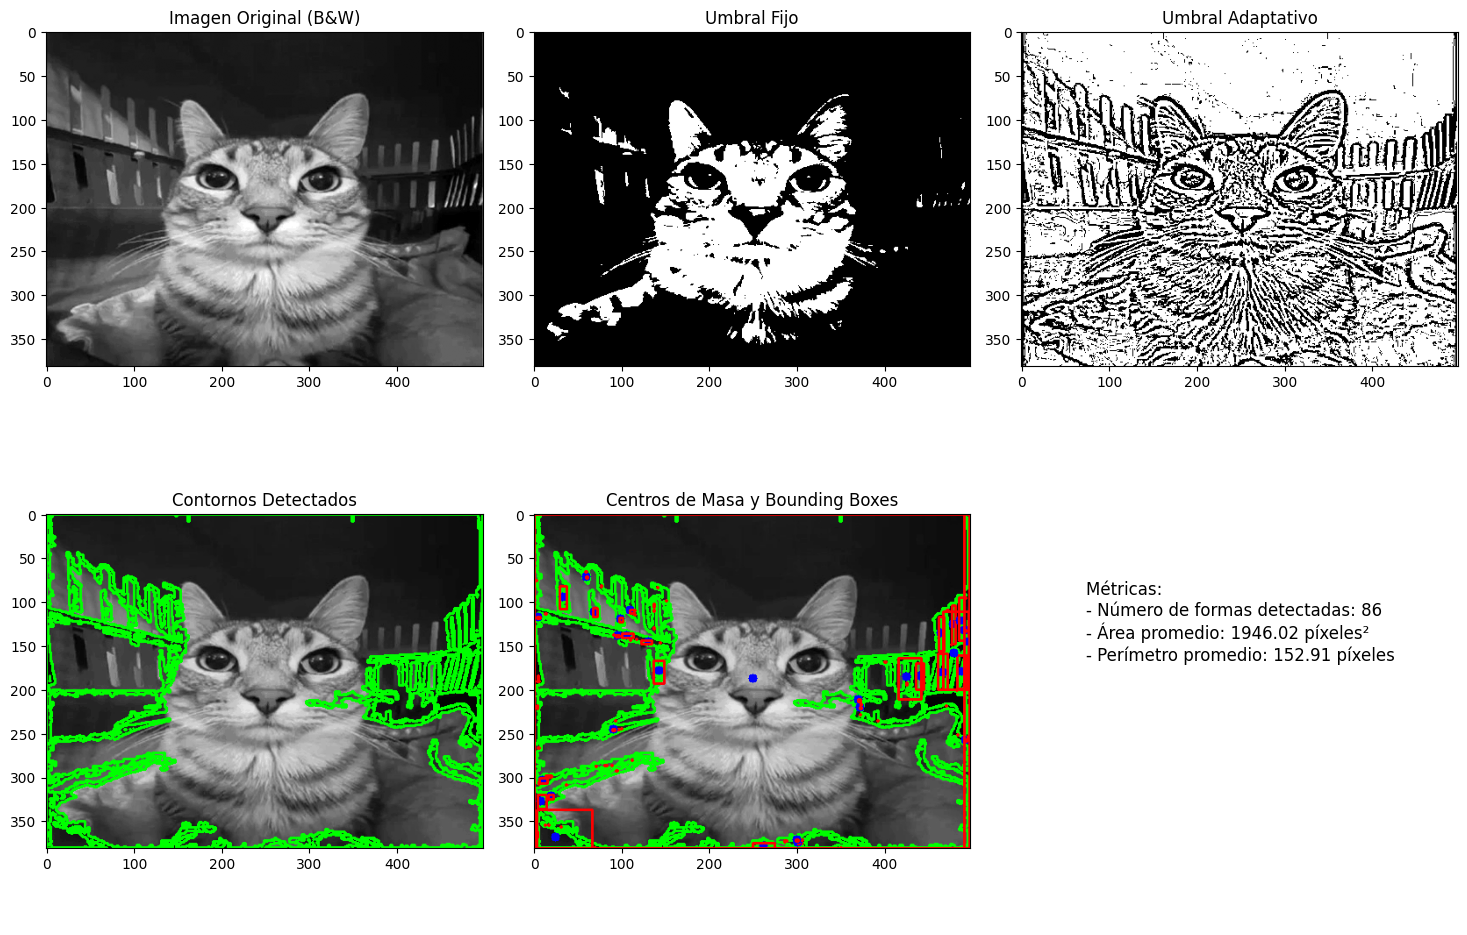

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
imagen = cv2.imread('cat-face.png', cv2.IMREAD_GRAYSCALE)

if imagen is None:
    print("Error al cargar la imagen")
else:
    # Mostrar imagen original
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    plt.title('Imagen Original (B&W)')
    plt.imshow(imagen, cmap='gray')
    
    # Segmentación binaria con umbral fijo
    _, umbral_fijo = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)
    plt.subplot(2, 3, 2)
    plt.title('Umbral Fijo')
    plt.imshow(umbral_fijo, cmap='gray')
    
    # Segmentación binaria con umbral adaptativo
    umbral_adaptativo = cv2.adaptiveThreshold(
        imagen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 11, 2
    )
    plt.subplot(2, 3, 3)
    plt.title('Umbral Adaptativo')
    plt.imshow(umbral_adaptativo, cmap='gray')
    
    # Detectar contornos en la imagen con umbral adaptativo
    contornos, _ = cv2.findContours(
        umbral_adaptativo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    
    # Crear imagen a color para dibujar contornos
    imagen_color = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(imagen_color, contornos, -1, (0, 255, 0), 2)
    
    plt.subplot(2, 3, 4)
    plt.title('Contornos Detectados')
    plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
    
    # Calcular métricas y dibujar centros de masa y bounding boxes
    areas = []
    perimetros = []
    imagen_resultados = imagen_color.copy()
    
    for i, contorno in enumerate(contornos):
        # Calcular momentos
        M = cv2.moments(contorno)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            # Dibujar centro de masa
            cv2.circle(imagen_resultados, (cx, cy), 5, (255, 0, 0), -1)
            
        # Calcular y dibujar bounding box
        x, y, w, h = cv2.boundingRect(contorno)
        cv2.rectangle(imagen_resultados, (x, y), (x+w, y+h), (0, 0, 255), 2)
        
        # Calcular área y perímetro
        area = cv2.contourArea(contorno)
        perimetro = cv2.arcLength(contorno, True)
        areas.append(area)
        perimetros.append(perimetro)
    
    plt.subplot(2, 3, 5)
    plt.title('Centros de Masa y Bounding Boxes')
    plt.imshow(cv2.cvtColor(imagen_resultados, cv2.COLOR_BGR2RGB))
    
    # Calcular y mostrar métricas
    num_formas = len(contornos)
    area_promedio = np.mean(areas) if areas else 0
    perimetro_promedio = np.mean(perimetros) if perimetros else 0
    
    metricas = f"""
    Métricas:
    - Número de formas detectadas: {num_formas}
    - Área promedio: {area_promedio:.2f} píxeles²
    - Perímetro promedio: {perimetro_promedio:.2f} píxeles
    """
    
    plt.subplot(2, 3, 6)
    plt.axis('off')
    plt.text(0.1, 0.5, metricas, fontsize=12)
    
    plt.tight_layout()
    plt.show()
